# hito 2 Desafio 1 Determinantes del ingreso

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Librerias para filtrar warnings
import pandas as pd
import numpy as np
#Libreria de analisis numerico
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
#librerias de graficos
from scipy import stats
#Librerias estadisticas
import statsmodels.api as sm
import statsmodels.formula.api as smf
#librerias de estadsitica aplicada


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
#Librerias espeficias para regresion logistica, su validadion, presicion y evaluar su eficacia.
#Pueden faltar librerias para temas mas especificos y al a vez librerias util que permitan funciones adicionales
from functions import printUniques , replaceAll

In [2]:
df = pd.read_csv('income-db.csv')
df_filter = df

In [3]:
df_filter = replaceAll(df_filter,'?',np.nan)
df_filter = replaceAll(df_filter,['Exec-managerial','Prof-specialty','Adm-clerical','Sales','Tech-support'],'white-collar')
df_filter = replaceAll(df_filter,['Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Protective-serv','Priv-house-serv'],'blue-collar')
df_filter = replaceAll(df_filter,['Other-service','Armed-Forces'],'others')
df_filter = replaceAll(df_filter,['Federal-gov'],'federal-gov')
df_filter = replaceAll(df_filter,['State-gov','Local-gov'],'state-level-gov' )
df_filter = replaceAll(df_filter,['Self-emp-inc','Self-emp-not-inc'],'self-employ' )
df_filter = replaceAll(df_filter,['Never-worked','Without-pay'],'unemployed' )
df_filter = replaceAll(df_filter,['Preschool'],'preschool')
df_filter = replaceAll(df_filter,['1st-4th','5th-6th'],'elementary-school')
df_filter = replaceAll(df_filter,['7th-8th','9th','10th','11th','12th','HS-grad'],'high-school')
df_filter = replaceAll(df_filter,['Assoc-voc','Assoc-acdm','Some-college'],'college')
df_filter = replaceAll(df_filter,['Bachelors','Masters','Prof-school','Doctorate'],'university')
df_filter = replaceAll(df_filter,['Married-civ-spouse','Married-spouse-absent','Married-AF- spouse'],'married' )
df_filter = replaceAll(df_filter,['Divorced'],'divorced')
df_filter = replaceAll(df_filter,['Separated'],'separated')
df_filter = replaceAll(df_filter,['Widowed'],'widowed')
df_filter = replaceAll(df_filter,['United-States','Mexico','Puerto-Rico','Canada','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Columbia','Haiti','Nicaragua','Peru','Ecuador','Trinadad&Tobago','Outlying-US(Guam-USVI-etc)','Honduras'],'America')
df_filter = replaceAll(df_filter,['England','Portugal','Italy','Germany','Poland','Greece','Ireland','France','Scotland','Yugoslavia','Hungary','Holand-Netherlands'],'Europe')
df_filter = replaceAll(df_filter,['Philippines','India','China','Japan','South','Vietnam','Iran','Taiwan','Thailand','Hong','Cambodia','Laos'],'Asia')
df_filter = replaceAll(df_filter,['<=50K','>50K'], [0,1])


In [4]:
df_filter['collars'] = df_filter['occupation']
df_filter = df_filter.drop('occupation', axis=1)
df_filter['workclass_recod'] = df_filter['workclass']
df_filter = df_filter.drop('workclass', axis=1)
df_filter['education_recod'] = df_filter['education']
df_filter = df_filter.drop('education', axis=1)
df_filter['civstatus'] = df_filter['marital-status']
df_filter = df_filter.drop('marital-status', axis=1)

In [5]:
    df_dummy = pd.get_dummies(df_filter)

In [6]:
df_dummy.columns.values

array(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'gender_Female', 'gender_Male',
       'native-country_America', 'native-country_Asia',
       'native-country_Europe', 'collars_blue-collar', 'collars_others',
       'collars_white-collar', 'workclass_recod_Private',
       'workclass_recod_federal-gov', 'workclass_recod_self-employ',
       'workclass_recod_state-level-gov', 'workclass_recod_unemployed',
       'education_recod_college', 'education_recod_elementary-school',
       'education_recod_high-school', 'education_recod_preschool',
       'education_recod_university', 'civstatus_Married-AF-spouse',
       'civstatus_Never-married', '

# La inspección visual del vector objetivo. (2 puntos)

In [7]:
df_dummy['income'].value_counts('%')

0    0.760718
1    0.239282
Name: income, dtype: float64

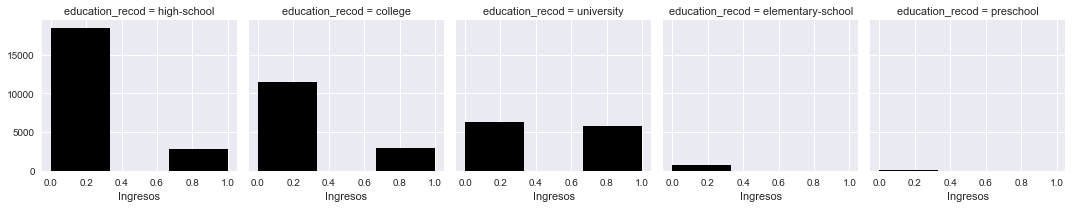

In [8]:
plot = sns.FacetGrid(data = df_filter, col = 'education_recod', margin_titles = True)
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', color = 'black', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

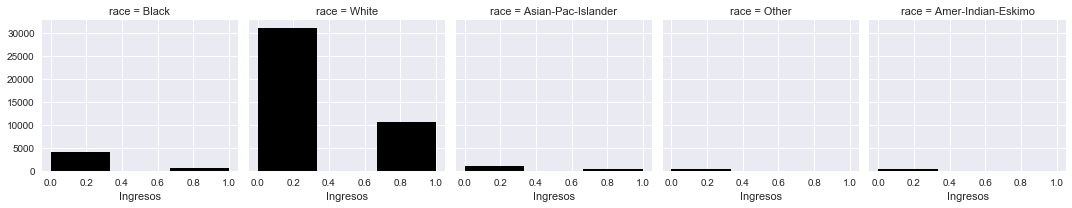

In [9]:
plot = sns.FacetGrid(data = df_filter, col = 'race', margin_titles = True)
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', color = 'black', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

Muestra muy sesgada en raza blanca, aunque la data presentada muestra algo de equidad en razas distintas

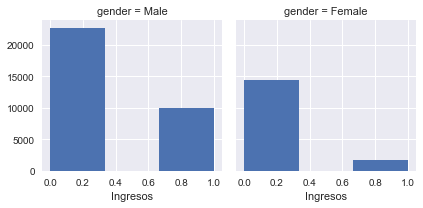

In [10]:
plot = sns.FacetGrid(data = df_filter, col = 'gender', margin_titles = True)
sns.color_palette('Set1')
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

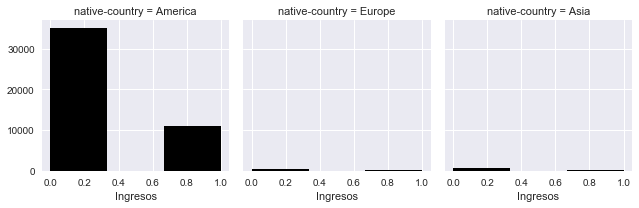

In [11]:
plot = sns.FacetGrid(data = df_filter, col = 'native-country', margin_titles = True)
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', color = 'black', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

Muestra muy sesgada, demaciada informacion concentrada en continente americano

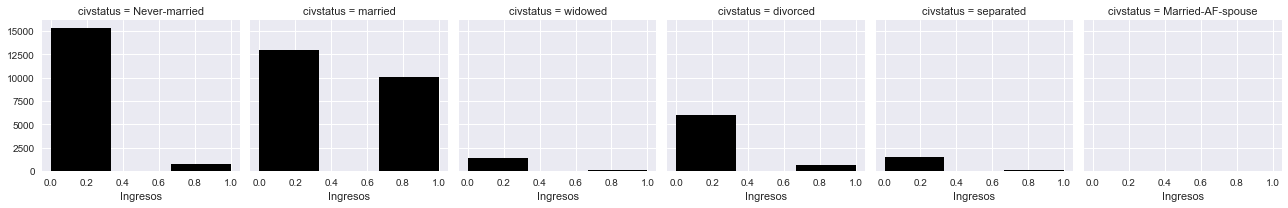

In [12]:
plot = sns.FacetGrid(data = df_filter, col = 'civstatus', margin_titles = True)
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', color = 'black', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

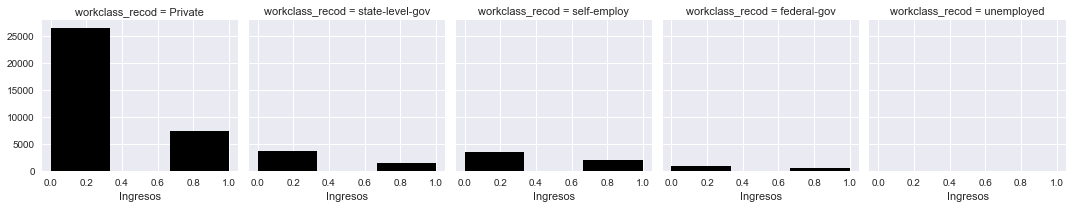

In [13]:
plot = sns.FacetGrid(data = df_filter, col = 'workclass_recod', margin_titles = True)
bins = np.linspace(0, 1, 4)
plot = plot.map(plt.hist, 'income', color = 'black', lw = 0, bins = bins)
plot.set_axis_labels('Ingresos', '')
sns.despine(left = True, bottom = True)

Detecto algunas tendencias de manera inferencial puedo identificar que variables influyen mas o menos en el modelo a generar, esto lo demostrare en el proximo hito

# La inspección visual de las variables. (2 puntos)


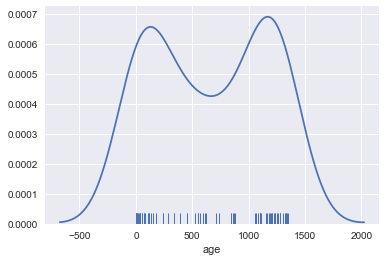

In [28]:
from scipy.stats import norm
sns.distplot(df_filter['age'].value_counts(), rug=True, hist=False)

In [30]:
#distribucion empirica de una variable
df_filter['workclass_recod'].value_counts('%')

Private            0.736399
self-employ        0.120692
state-level-gov    0.111135
federal-gov        0.031101
unemployed         0.000673
Name: workclass_recod, dtype: float64

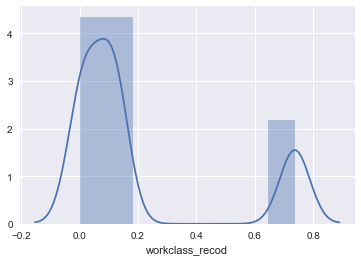

In [29]:
sns.distplot(df_filter['workclass_recod'].value_counts('%'))

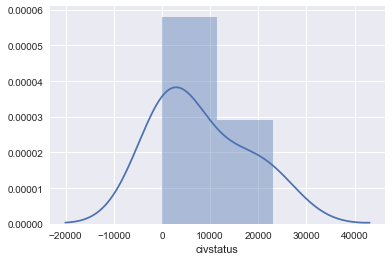

In [32]:
sns.distplot(df_filter['civstatus'].value_counts())

# La inspección de datos perdidos en las variables. (1 punto)

In [18]:
import missingno as msgn

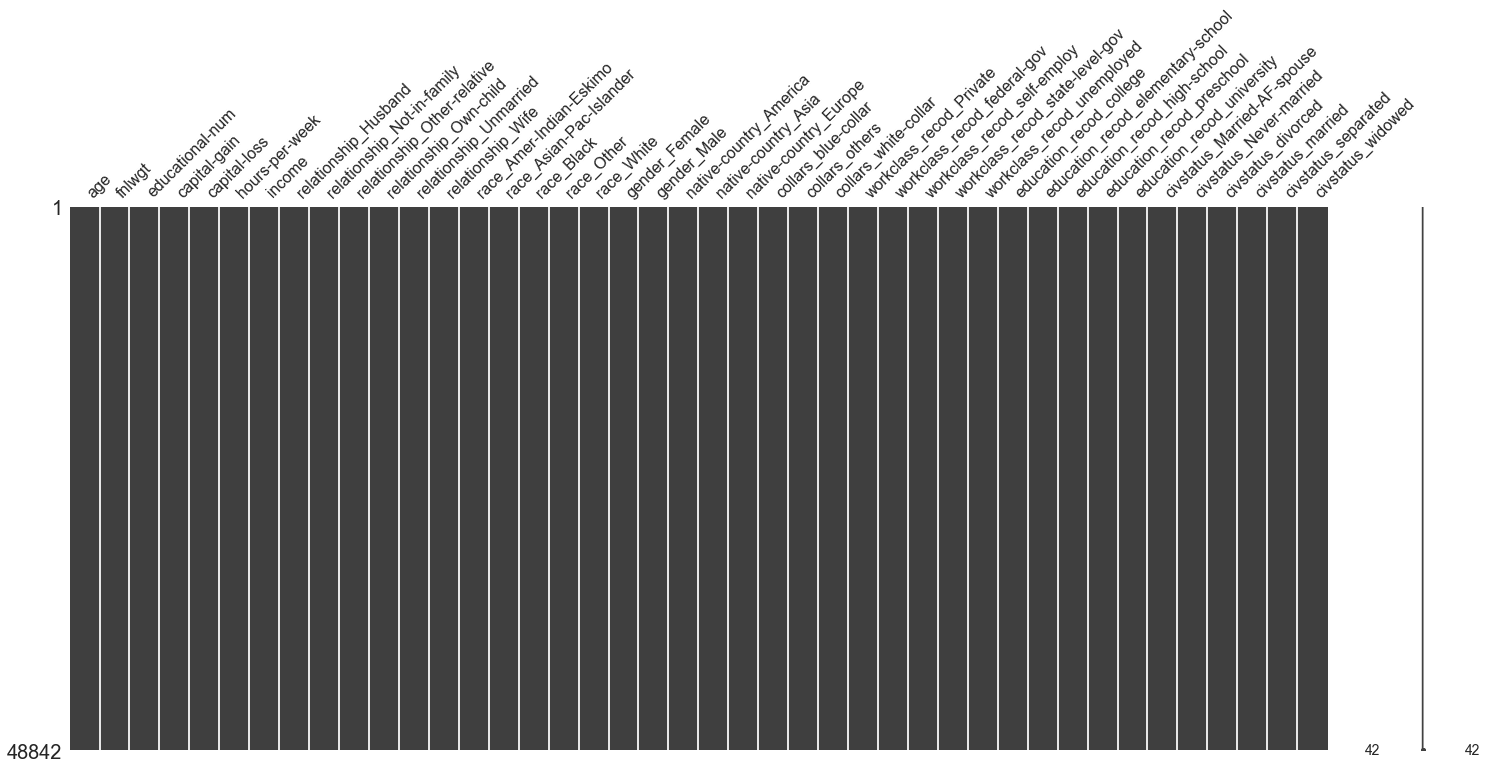

In [19]:
msgn.matrix(df_dummy)

Al "binarizar" las variables podemos mantener la integridad de la bbdd sin eliminar directamente la data faltante, asi poder reconocer un valor mas preciso de nuestras variables

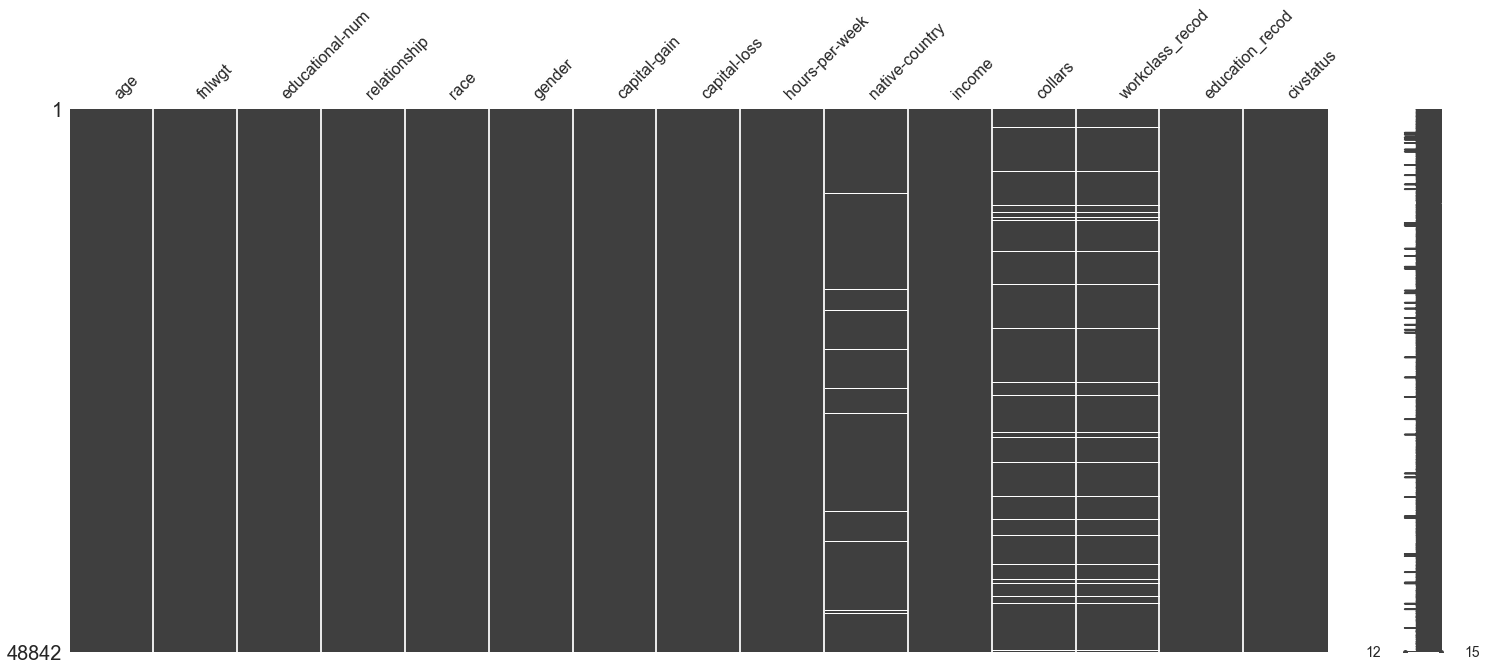

In [20]:
msgn.matrix(df_filter.replace('NA', np.nan))

    Se verifican datos perdidos principalmente en collas y workclass_recod y en pocos casos las regioens de origen
    
    Al ver la tendencia a que al no haber data de collars tampoco esta la del workclass_recod, se analizara la factibilidad de homologar o limpiar estos valores NA
